> **Welcome to the Investigate a Dataset project**

# Project:  Movies Data Analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Data that I'm going to Investigate is about movies that involve (name of the movie, actors, directors, budgets, rating, revenue ...Features).  the investigation is going to cover the following questions:

1- What are the types of movies required/have the most budget?

2- Do these movies with highest budget casted the most votes regarding rating?

3- Does comedy movies bring more revenue than drama ones and does it impact popularity?


In [2]:
#importing the needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
Here we going to inspect and asses our data to clean it later
> **about**: I will import the data, check for accuracy, and then trim and prepare the dataset for analysis in this phase of the report. 

Now we will read the data from csv file to know more about the data in general by printing the very 20 rows of the data.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibaly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head(20)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

Here we want to know the total number of rows and column in the dataset

In [4]:
#total number of rows and column 
df.shape

(10866, 21)

Displying some statistics about the data

In [5]:
#statistics about the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


displaying more information regarding the columns including data types of each column, non-null values, null values and index of each column. As we can see some of these columns have missing values(imdb_id,cast,homepage,director,tagline,keywords,overview,genres,production_companies) and some of them we don't need in our investigation including (imdb_id,homepage,tagline,keywords,overview,,production_companies).

In [6]:
#more information regarding the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### Data Cleaning 
> **about**: correction or deletion of duplicate, erroneous, corrupted, improperly structured, or incomplete data from a dataset.


know we will drop unwanted Columns

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['imdb_id','homepage','tagline','keywords','overview','production_companies'], axis = 1, inplace = True)
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   cast            10790 non-null  object 
 6   director        10822 non-null  object 
 7   runtime         10866 non-null  int64  
 8   genres          10843 non-null  object 
 9   release_date    10866 non-null  object 
 10  vote_count      10866 non-null  int64  
 11  vote_average    10866 non-null  float64
 12  release_year    10866 non-null  int64  
 13  budget_adj      10866 non-null  float64
 14  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.2+ MB


looking at null data of cast coulmn which is 76 rows and as we can see the max budget and revenue are within the range of our Analysis goals. Therefore, we going to replace the null value of the case team with 'not specified'.

In [9]:
#null data of cast coulmn 
df[df.cast.isnull()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,345637,0.422901,0,0,Sanjay's Super Team,NaN,Sanjay Patel,7,Animation,11/25/15,47,6.9,2015,0.000000,0.0
441,355020,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,98,Documentary,10/9/15,37,8.2,2015,0.000000,0.0
465,321109,0.201696,0,0,Bitter Lake,NaN,Adam Curtis,135,Documentary,1/24/15,19,7.8,2015,0.000000,0.0
536,333350,0.122543,0,0,A Faster Horse,NaN,David Gelb,90,Documentary,10/8/15,12,8.0,2015,0.000000,0.0
538,224972,0.114264,0,0,The Mask You Live In,NaN,Jennifer Siebel Newsom,88,Documentary,1/1/15,11,8.9,2015,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677,13926,0.253376,0,0,Red's Dream,NaN,John Lasseter,4,Animation,8/17/87,44,6.6,1987,0.000000,0.0
9755,48714,0.046272,0,0,The Big Shave,NaN,Martin Scorsese,6,Drama,1/1/68,12,6.7,1968,0.000000,0.0
10434,48784,0.146906,200,0,Six Men Getting Sick,NaN,David Lynch,4,Animation,1/1/67,16,5.2,1967,1307.352748,0.0
10550,13925,0.306425,0,0,Luxo Jr.,NaN,John Lasseter,2,Animation|Family,8/17/86,81,7.3,1986,0.000000,0.0


In [10]:
df[df.cast.isnull()].describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,76.000000,76.000000,7.600000e+01,7.600000e+01,76.000000,76.000000,76.000000,76.000000,7.600000e+01,7.600000e+01
mean,125506.526316,0.149994,2.941621e+05,4.672654e+05,63.026316,29.013158,6.884211,2005.934211,3.650807e+05,4.502022e+05
std,115445.521218,0.155772,1.071113e+06,3.832449e+06,53.758962,25.644489,0.893391,11.682848,1.315753e+06,3.640414e+06
min,3171.000000,0.001662,0.000000e+00,0.000000e+00,2.000000,10.000000,4.700000,1967.000000,0.000000e+00,0.000000e+00
25%,23685.000000,0.031777,0.000000e+00,0.000000e+00,7.750000,12.000000,6.475000,2005.750000,0.000000e+00,0.000000e+00
50%,77621.500000,0.088212,0.000000e+00,0.000000e+00,74.500000,18.500000,6.950000,2011.000000,0.000000e+00,0.000000e+00
75%,242661.250000,0.211834,0.000000e+00,0.000000e+00,93.250000,37.250000,7.525000,2014.000000,0.000000e+00,0.000000e+00
max,376823.000000,0.664023,7.000000e+06,3.340000e+07,360.000000,154.000000,8.900000,2015.000000,7.361680e+06,3.172146e+07


looking at null data of direector coulmn which is 44 rows and as we can see the max budget and max revenue are within the range of our Analysis goals. Therefore, we going to replace the null value of the director coulmn with 'not specified'.

In [11]:
#null data of direector coulmn
df[df.director.isnull()].shape

(44, 15)

In [12]:
df[df.director.isnull()].describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,44.000000,44.000000,4.400000e+01,4.400000e+01,44.000000,44.000000,44.000000,44.000000,4.400000e+01,4.400000e+01
mean,150723.818182,0.133886,2.859091e+05,2.500000e+05,87.681818,17.659091,6.836364,2007.954545,2.807973e+05,2.531967e+05
std,121898.048432,0.109210,1.072496e+06,1.658312e+06,93.719962,8.928510,0.906845,9.019242,1.048672e+06,1.679517e+06
min,15467.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,4.900000,1967.000000,0.000000e+00,0.000000e+00
25%,35631.750000,0.047070,0.000000e+00,0.000000e+00,50.000000,11.000000,6.075000,2008.000000,0.000000e+00,0.000000e+00
50%,85659.000000,0.119372,0.000000e+00,0.000000e+00,65.500000,14.000000,6.800000,2010.000000,0.000000e+00,0.000000e+00
75%,262226.750000,0.179587,0.000000e+00,0.000000e+00,95.250000,19.250000,7.525000,2013.000000,0.000000e+00,0.000000e+00
max,369145.000000,0.443952,5.000000e+06,1.100000e+07,561.000000,42.000000,8.600000,2015.000000,4.680167e+06,1.114065e+07


In [13]:
# replace the null value of the director coulmn with 'not specified'.
df[['cast', 'director']] = df[['cast', 'director']].fillna('not specified')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   cast            10866 non-null  object 
 6   director        10866 non-null  object 
 7   runtime         10866 non-null  int64  
 8   genres          10843 non-null  object 
 9   release_date    10866 non-null  object 
 10  vote_count      10866 non-null  int64  
 11  vote_average    10866 non-null  float64
 12  release_year    10866 non-null  int64  
 13  budget_adj      10866 non-null  float64
 14  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.2+ MB


Now we have genres column with null values, and only 23 rows are null,  so we going to drop them because is not going to impact the overall analysis.

In [15]:
#genres column with null values
df[df.genres.isnull()].describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,23.000000,23.000000,23.000000,23.0,23.000000,23.000000,23.000000,23.000000,23.000000,23.0
mean,158317.130435,0.167966,217.391304,0.0,70.652174,17.521739,6.421739,2004.652174,1220.949640,0.0
std,117541.256600,0.126428,1042.572070,0.0,52.115788,11.746835,1.231760,12.470360,5855.468772,0.0
min,4255.000000,0.020701,0.000000,0.0,0.000000,10.000000,3.000000,1970.000000,0.000000,0.0
25%,57348.000000,0.075151,0.000000,0.0,28.000000,11.000000,5.850000,2000.500000,0.000000,0.0
50%,127717.000000,0.130018,0.000000,0.0,76.000000,12.000000,6.700000,2010.000000,0.000000,0.0
75%,241526.000000,0.246796,0.000000,0.0,100.000000,18.500000,7.100000,2012.500000,0.000000,0.0
max,369145.000000,0.520520,5000.000000,0.0,220.000000,57.000000,8.500000,2015.000000,28081.841720,0.0


In [16]:
#drop/delete null values
df.dropna(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10843 non-null  int64  
 1   popularity      10843 non-null  float64
 2   budget          10843 non-null  int64  
 3   revenue         10843 non-null  int64  
 4   original_title  10843 non-null  object 
 5   cast            10843 non-null  object 
 6   director        10843 non-null  object 
 7   runtime         10843 non-null  int64  
 8   genres          10843 non-null  object 
 9   release_date    10843 non-null  object 
 10  vote_count      10843 non-null  int64  
 11  vote_average    10843 non-null  float64
 12  release_year    10843 non-null  int64  
 13  budget_adj      10843 non-null  float64
 14  revenue_adj     10843 non-null  float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.3+ MB


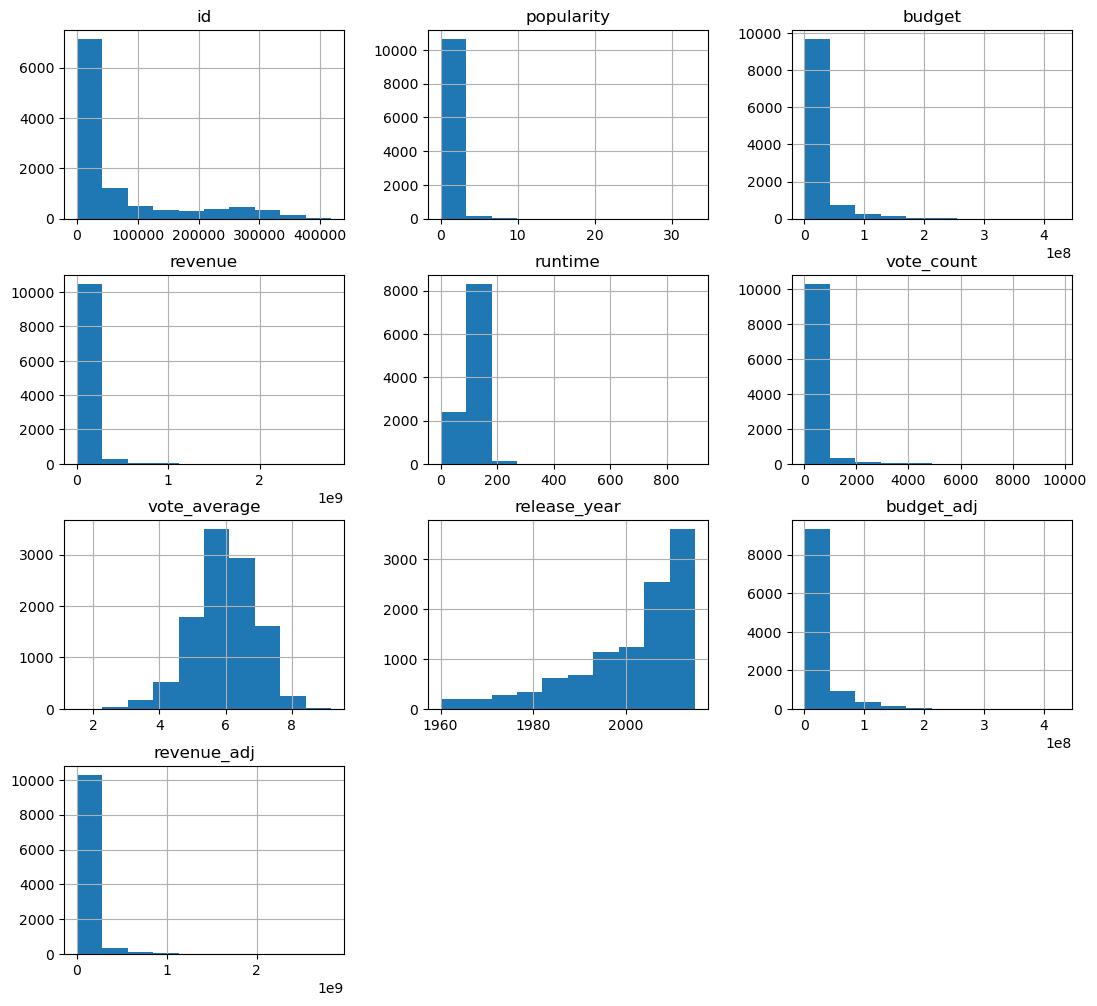

In [18]:
df.hist(figsize=(13,12));

Now lets look at the data types of columns and we can see that the release date type is object while it should be datetime. so we going to change it.

In [19]:
# this returns the datatypes of the columns
df.dtypes

id                  int64
popularity        float64
budget              int64
revenue             int64
original_title     object
cast               object
director           object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

In [20]:
type(df['release_date'][0])

str

In [21]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [22]:
df.dtypes

id                         int64
popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
dtype: object

look at any duplication rows in the dataframe and drop them

In [23]:
#look at any duplication rows 
sum(df.duplicated())

1

In [24]:
# duplicated rows
duplicated_v=df.duplicated()
df[duplicated_v]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,2010-03-20,110,5.0,2010,30000000.0,967000.0


In [25]:
#delete  duplicated rows
df.drop_duplicates(inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10842 non-null  int64         
 1   popularity      10842 non-null  float64       
 2   budget          10842 non-null  int64         
 3   revenue         10842 non-null  int64         
 4   original_title  10842 non-null  object        
 5   cast            10842 non-null  object        
 6   director        10842 non-null  object        
 7   runtime         10842 non-null  int64         
 8   genres          10842 non-null  object        
 9   release_date    10842 non-null  datetime64[ns]
 10  vote_count      10842 non-null  int64         
 11  vote_average    10842 non-null  float64       
 12  release_year    10842 non-null  int64         
 13  budget_adj      10842 non-null  float64       
 14  revenue_adj     10842 non-null  float64       
dtypes:

display the unique values 

In [27]:
df.nunique()

id                10842
popularity        10791
budget              557
revenue            4702
original_title    10548
cast              10698
director           5057
runtime             246
genres             2039
release_date       5904
vote_count         1289
vote_average         72
release_year         56
budget_adj         2613
revenue_adj        4840
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> **about**:To answer the study questions i stated in the Introduction section, here I compute statistics and produce visuals. While,  Examining one variable at a time, then look at how it is related to other variables.

### Research Question 1: What are the types of movies required/have the most budget?

Now, we will Investigate the relationship between types of movies (genres) and associated budget. first will split the column of genres (movie types) as it consists of multiple values. 

independent variable (single variable) is the movie types (geners) and multiple variables are budget, counting and popularity

In [28]:
#will split the column of genres (movie types) as it consists of multiple values. 
df['genres'] = df['genres'].str.split('|')
new_df = df.explode('genres')
new_df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


how many movies in each category 

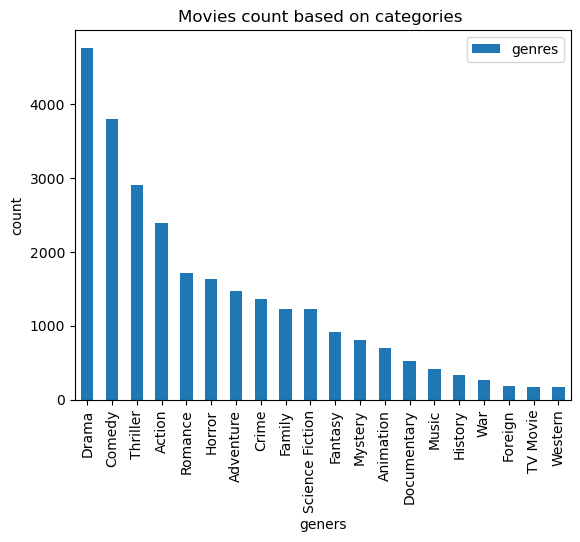

In [29]:
new_df['genres'].value_counts().plot(kind='bar');
plt.xlabel('geners')
plt.ylabel('count')
plt.title("Movies count based on categories ")
plt.legend()

This graph shows the association between budget and movie types as we can see TV movies have/cost the least amount of budget in comparison with other types of movies. 

Text(0.5, 1.0, "Movies' budget based on categories ")

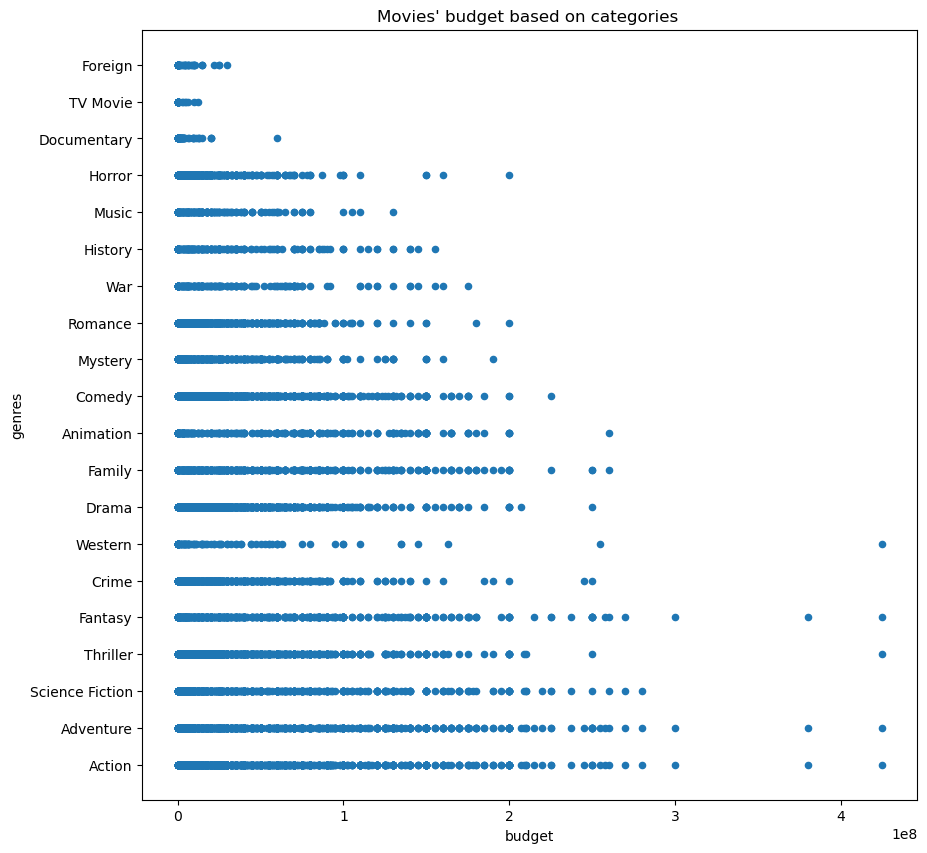

In [90]:
new_df.plot(x='budget', y= 'genres', kind = 'scatter',figsize = (10,10));
plt.title("Movies' budget based on categories ")


however, which category/categories of movies consumed/required the largest amount of budget? The following graph shows categories and their corresponding budget portions. There are three top categories their movies have large budgets including action, fantasy, and adventure movies.

Text(0.5, 1.0, 'Movies categories and corresponding budget ')

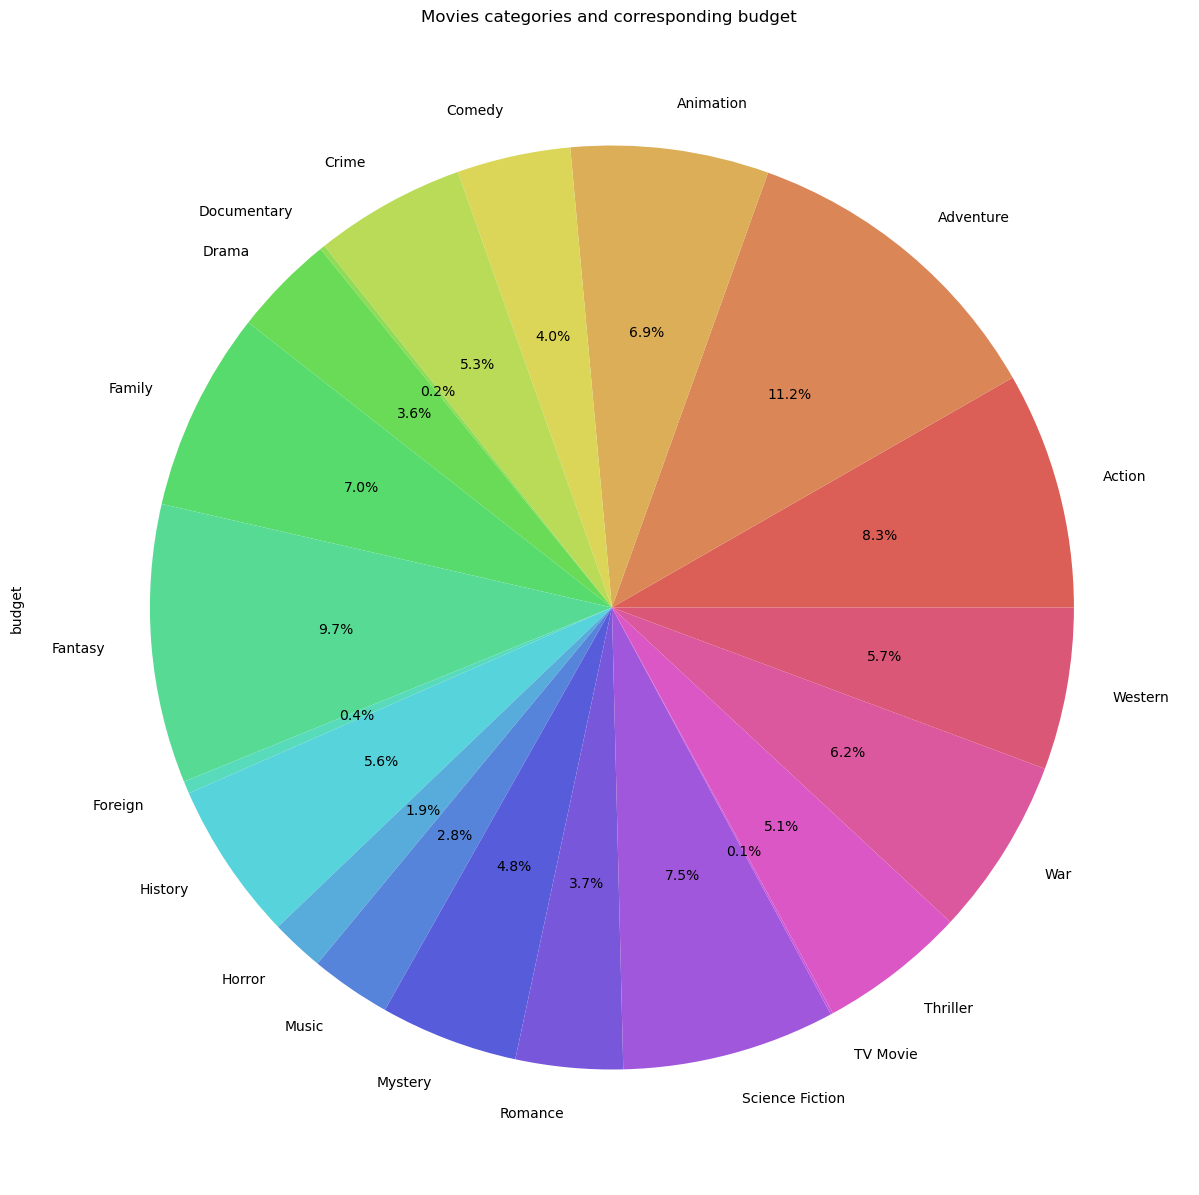

In [31]:
# avoiding color repitation in pie chart from https://stackoverflow.com/questions/6027690/how-to-avoid-line-color-repetition-in-matplotlib-pyplot
from matplotlib import cm

colors = sns.color_palette('hls', 20)
new_df.groupby('genres').budget.mean().plot(kind='pie',figsize = (15,15),colors=colors,legend=False, autopct='%1.1f%%')
plt.title("Movies categories and corresponding budget ")
#plt.legend()

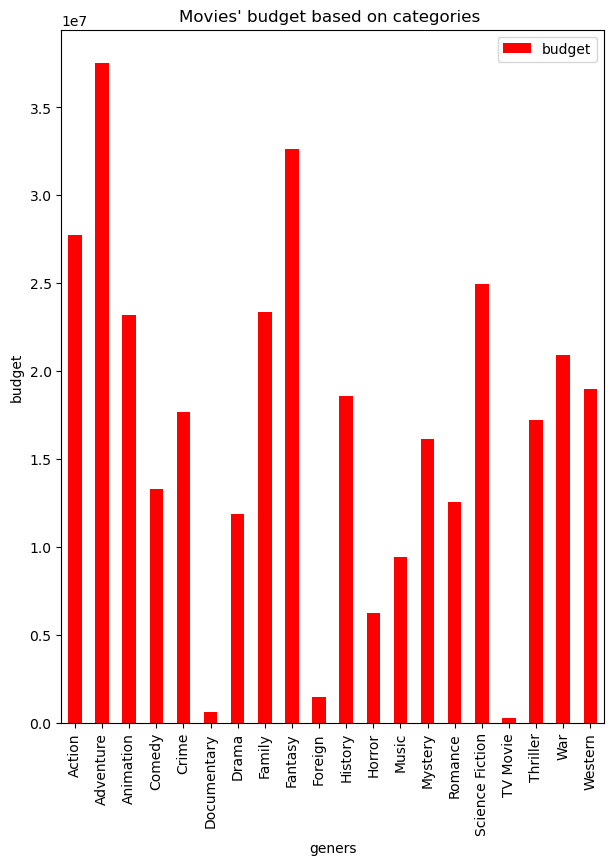

In [89]:
#plot of Movies' budget based on categories
new_df.groupby('genres').budget.mean().plot(kind='bar',figsize = (7,9), color='red')
plt.xlabel('geners')
plt.ylabel('budget')
plt.title("Movies' budget based on categories ")
plt.legend()

as we can see from the above charts that action, fantasy, and adventure movies are the ones that required the most budget.

Now lets The popularity of movies based on categories 

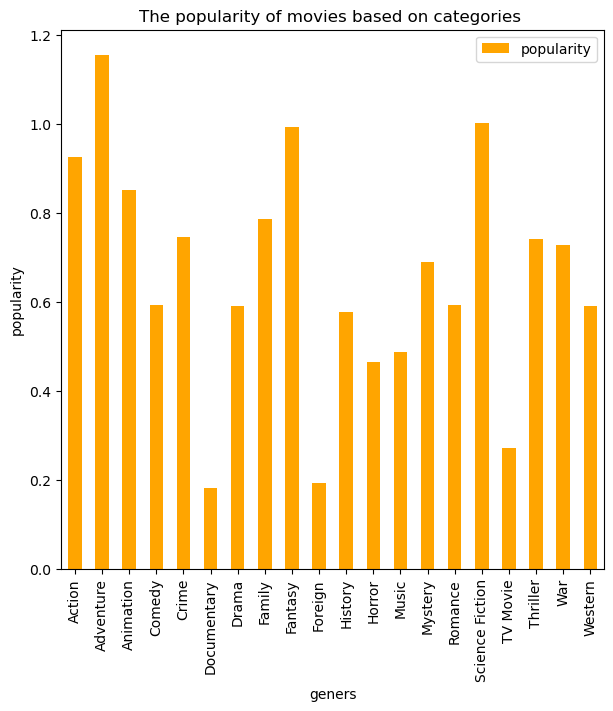

In [33]:
#sort_values('Salary') reset_index().sort_values('popularity')
data=  new_df.groupby('genres').popularity.mean()
data.plot(kind='bar',figsize = (7,7), color='orange')
plt.xlabel('geners')
plt.ylabel('popularity')
plt.title("The popularity of movies based on categories ")
plt.legend()

### Research Question 2 : Does these movies with highest budget casted the most votes regarding rating?

We going look at the top three categories starting with action movies.

Note: independent variable (single variable) is budget and multiple variables are votes-rating, runtime (duration of movie) and year released.

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'release_date'}>],
       [<AxesSubplot:title={'center':'vote_count'}>,
        <AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>],
       [<AxesSubplot:title={'center':'budget_adj'}>,
        <AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>]],
      dtype=object)

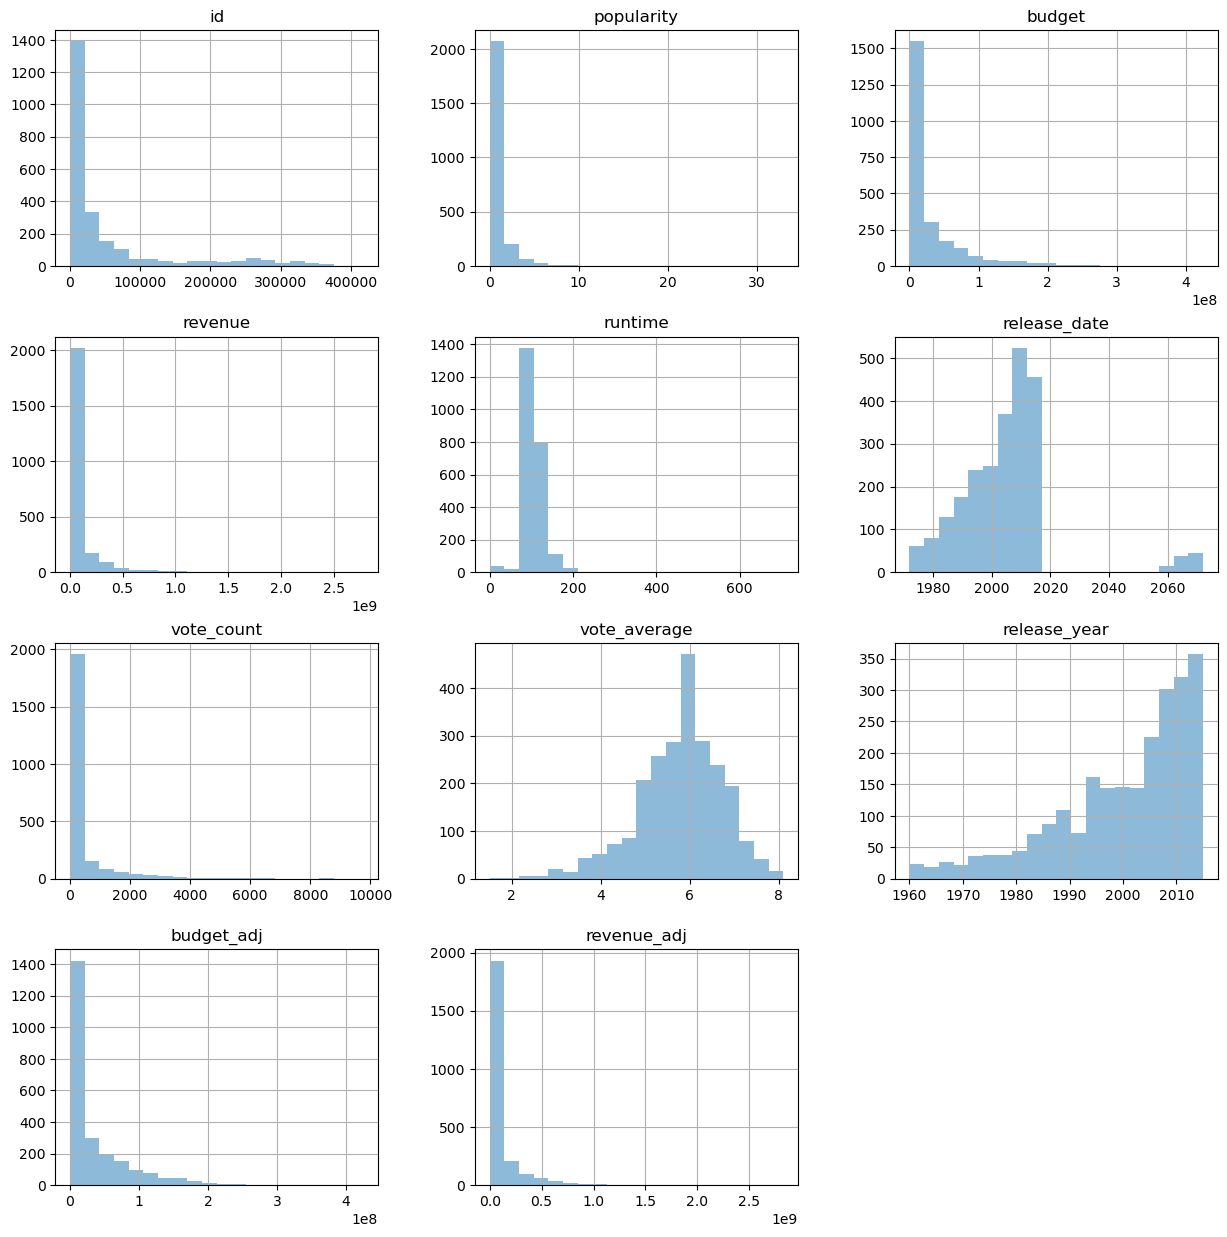

In [34]:
action_movies= new_df.query('genres == "Action"')
action_movies.hist(alpha=0.5, bins=20, label='Action',figsize = (15,15))

Retrieve the movie with the largest budget among all the action movies in the list and let's see if it indeed cast the most votes compared to other action movies.

In [35]:
#Retrieve the movie with the largest budget
action_budgetMax=action_movies.budget.max()
action_budgetMax

425000000

In [36]:
#rating of action movie with highest budget in the list of action movies
action_vote=action_movies.query('budget==425000000').vote_average
action_vote

2244    6.4
Name: vote_average, dtype: float64

The highest-budget movie name in the action category is The Warrior's Way.

In [37]:
action_movies.query('budget==425000000')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,46528,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Action,2010-12-02,74,6.4,2010,425000000.0,11087569.0


In [38]:
#top rating  action movie in the list of action movies
action_movies.vote_average.max()

8.1

In [39]:
action_movies.query('vote_average==8.1').budget.max()

185000000

The movie that has the largest budget is The Warrior's Way with a vote average equal to 6.4. While the movies that cast the most votes are The Dark Knight with a budget equal to 185000000 and second one is Kill Bill: The Whole Bloody Affair with a budget 30000000

In [40]:
#movies with vote of 8.1
action_movies.query('vote_average==8.1')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2875,155,8.466668,185000000,1001921825,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,152,Action,2008-07-16,8432,8.1,2008,1.873655e+08,1.014733e+09
3826,414419,0.146477,30000000,0,Kill Bill: The Whole Bloody Affair,Uma Thurman|Lucy Liu|Vivica A. Fox|Daryl Hanna...,Quentin Tarantino,247,Action,2011-03-28,28,8.1,2011,2.908194e+07,0.000000e+00


Movies with the same budget as the most rated movie and less rating in Comparison.

In [41]:
# movies  have the same budget as max budget of 8.1 rating movie
action_movies[action_movies.budget==action_movies.query('vote_average==8.1').budget.max() ]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2875,155,8.466668,185000000,1001921825,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,152,Action,2008-07-16,8432,8.1,2008,1.873655e+08,1.014733e+09
2879,217,3.161670,185000000,786636033,Indiana Jones and the Kingdom of the Crystal S...,Harrison Ford|Cate Blanchett|Shia LaBeouf|Ray ...,Steven Spielberg,122,Action,2008-05-21,1537,5.6,2008,1.873655e+08,7.966945e+08
4371,62177,3.626741,185000000,538983207,Brave,Kelly Macdonald|Julie Walters|Billy Connolly|E...,Mark Andrews|Steve Purcell|Brenda Chapman,93,Action,2012-06-21,3206,6.6,2012,1.757027e+08,5.118962e+08


From above, We can see that the action movie with the highest budget does not have the top rating value among the list of all action movies. In fact, the movie with 8.1 ratings (the highest rating) cost much less budget while casting the Majority of votes. 

Now lets look at the release date and duration of the movies with max budget in the action category 

In [42]:
#duration of the max budget movie
action_runtime=action_movies.query('budget==425000000').runtime
action_runtime

2244    100
Name: runtime, dtype: int64

let's comapre it with action movies that has the max runtime 

In [43]:
#max duration time of a movie in action category
action_maxtime= action_movies.runtime.max()
action_maxtime

705

In [44]:
action_movies.query('runtime==705')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2722,331214,0.537593,0,125000000,Band of Brothers,Damian Lewis|Ron Livingston|Frank John Hughes|...,Phil Alden Robinson|Richard Loncraine|Mikael S...,705,Action,2001-09-09,313,8.0,2001,0.0,1.539360e+08


band of the brothers is the name of the movies with longest runtime and as we can see above its' revenue and budget are less that what the The Warrior's Way made

In [45]:
print(action_movies.query('runtime==705').release_date)
print(action_movies.query('budget==425000000').release_date)

2722   2001-09-09
Name: release_date, dtype: datetime64[ns]
2244   2010-12-02
Name: release_date, dtype: datetime64[ns]


the released date of highest budget movie is on the year of 2010 while the movie of longest duration time in action category released on 2001, 9 years different between the lunch date of the two movies which implact on the budget cost due to every year there are new technologies used on the field of movie creation.

Now let's have a look at the second category of movies that have big budgets and their Corresponding rating.

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'release_date'}>],
       [<AxesSubplot:title={'center':'vote_count'}>,
        <AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>],
       [<AxesSubplot:title={'center':'budget_adj'}>,
        <AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>]],
      dtype=object)

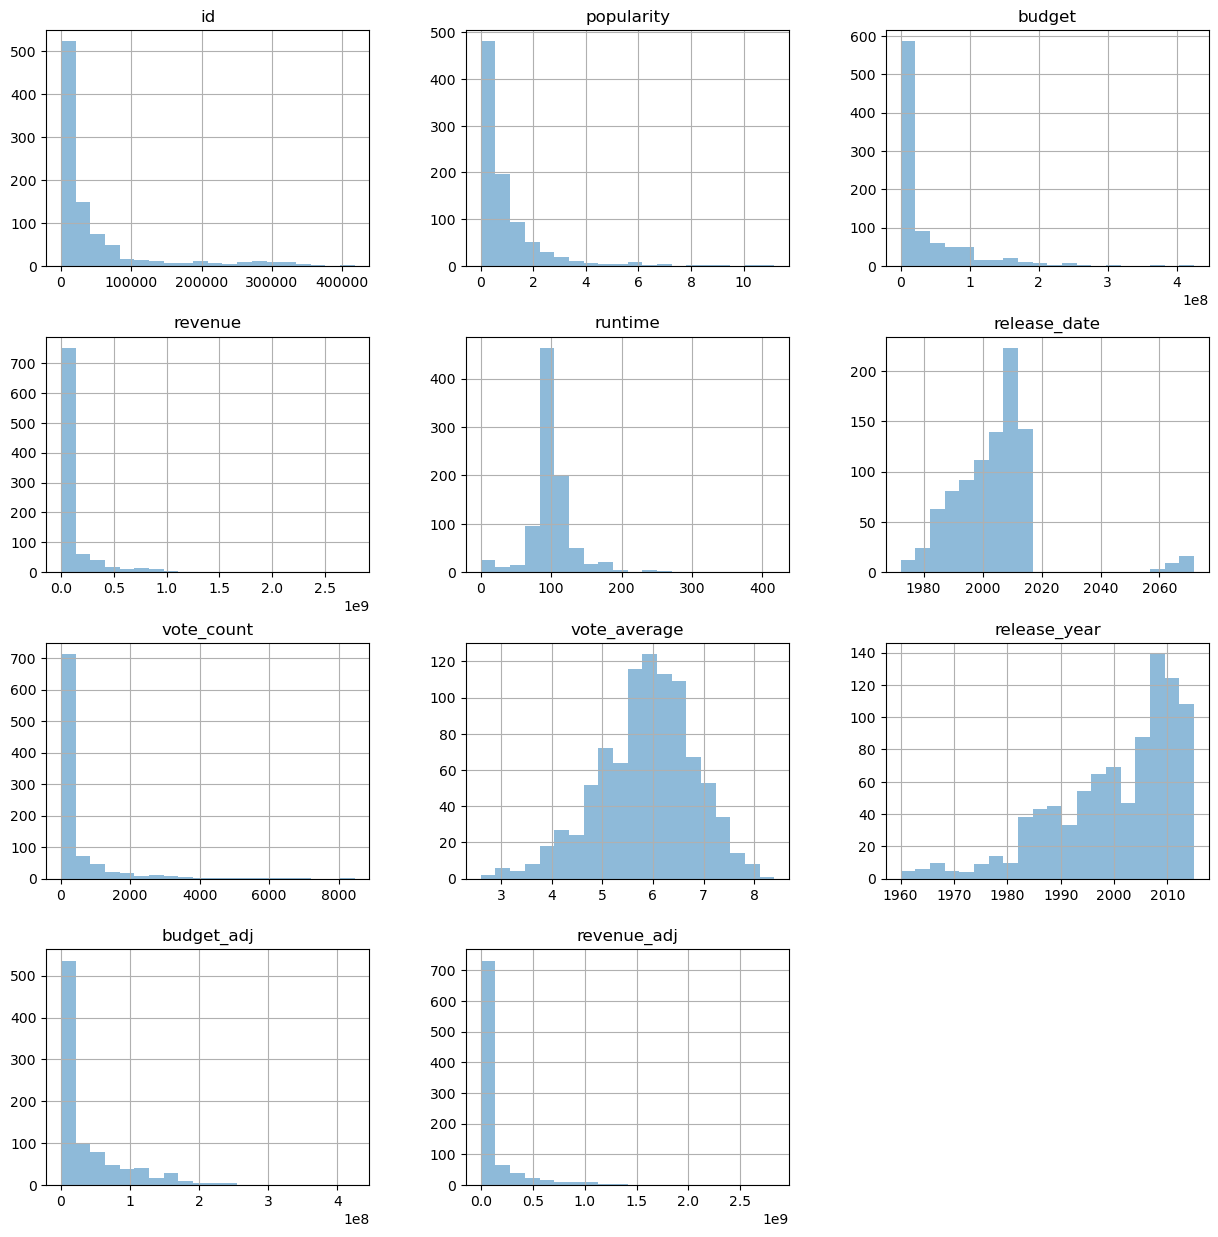

In [46]:
fantasy_movies= new_df.query('genres == "Fantasy"')
fantasy_movies.hist(alpha=0.5, bins=20, label='Fantasy',figsize = (15,15))

Retrieve the movie with the largest budget among all the fantasy movies in the list and let's see if it indeed cast the most votes compared to other fantasy movies.

In [47]:
#get the max budge of a movie in the fantasy movies
fantasy_budgetMax=fantasy_movies.budget.max()
fantasy_budgetMax

425000000

In [48]:
#its rating
fantasy_vote=fantasy_movies.query('budget==425000000').vote_average
fantasy_vote

2244    6.4
Name: vote_average, dtype: float64

The highest-budget movie name in fantasy movies is The Warrior's Way.

In [49]:
fantasy_movies.query('budget==425000000')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,46528,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Fantasy,2010-12-02,74,6.4,2010,425000000.0,11087569.0


In [50]:
#top rating  action movie in the list of action movies
fantasy_movies.vote_average.max()

8.4

In [51]:
#budget of 8.4 rating movies in fantasy field
fantasy_movies.query('vote_average==8.4').budget.max()

0

The movie that has the most budget is The Warrior's Way with a vote average equal to 6.4. While the movie that cast the most votes is Tropico with a budget equal to 0.

In [52]:
#he movie that cast the most votes 
fantasy_movies.query('vote_average==8.4')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
5923,241287,0.107333,0,0,Tropico,Lana Del Rey|Shaun Ross,Anthony Mandler,27,Fantasy,2013-12-05,24,8.4,2013,0.0,0.0


Movies with the same budget as the most rated movie and less rating in Comparison.

In [53]:
fantasy_movies[fantasy_movies.budget==fantasy_movies.query('vote_average==8.4').budget.max() ]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
74,347096,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,108,Fantasy,2015-06-24,27,5.1,2015,0.0,0.000000e+00
92,370687,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy,2015-12-19,11,5.4,2015,0.0,0.000000e+00
116,297291,1.380320,0,0,The Scorpion King: The Lost Throne,Victor Webster|Ellen Hollman|Barry Bostwick|Wi...,Mike Elliott,105,Fantasy,2015-01-09,22,4.5,2015,0.0,0.000000e+00
140,300803,1.144808,0,0,Dragonheart 3: The Sorcerer's Curse,Julian Morris|Tamzin Merchant|Jassa Ahluwalia|...,Colin Teague,97,Fantasy,2015-02-24,59,4.5,2015,0.0,0.000000e+00
197,312831,0.719407,0,0,The Hallow,Joseph Mawle|Bojana NovakoviÄ‡|Michael McElhat...,Corin Hardy,97,Fantasy,2015-11-06,122,4.9,2015,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10783,22049,0.330900,0,0,Starcrash,Marjoe Gortner|Caroline Munro|Christopher Plum...,Luigi Cozzi,94,Fantasy,1978-12-21,10,3.1,1978,0.0,0.000000e+00
10787,14822,0.282763,0,16393000,Return From Witch Mountain,Bette Davis|Christopher Lee|Kim Richards|Ike E...,John Hough,95,Fantasy,1978-03-10,22,5.8,1978,0.0,5.479689e+07
10798,12185,0.188821,0,0,Heaven Can Wait,Warren Beatty|Julie Christie|James Mason|Jack ...,Warren Beatty|Buck Henry,101,Fantasy,1978-06-28,40,6.3,1978,0.0,0.000000e+00
10823,3591,0.613444,0,0,One Million Years B.C.,Raquel Welch|John Richardson|Percy Herbert|Rob...,Don Chaffey,100,Fantasy,2066-12-30,17,5.6,1966,0.0,0.000000e+00


We can see that the fantasy movie with the highest budget does not have the top rating value among the list of all fantasy movies. In fact, the movie with 8.4 ratings cost much less budget while casting the most votes. 

Now lets look at the release date and duration of the movies with max budget in the fantasy category 

In [54]:
#duration of the max budget movie
fantasy_runtime=fantasy_movies.query('budget==425000000').runtime
fantasy_runtime

2244    100
Name: runtime, dtype: int64

let's comapre it with fantasy movies that has the max runtime 

In [55]:
#max duration time of a movie in the fantasy category 
fantasy_maxtime= fantasy_movies.runtime.max()
fantasy_maxtime

417

In [56]:
fantasy_movies.query('runtime==417')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
8766,110147,0.385239,0,0,The 10th Kingdom,Kimberly Williams-Paisley|Scott Cohen|John Lar...,David Carson|Herbert Wise,417,Fantasy,2000-02-25,33,7.3,2000,0.0,0.0


The 10th kingdom is the name of the movies with longest runtime and as we can see above its' revenue and budget are less that what the The Warrior's Way made

In [57]:
print(fantasy_movies.query('runtime==417').release_date)
print(fantasy_movies.query('budget==425000000').release_date)

8766   2000-02-25
Name: release_date, dtype: datetime64[ns]
2244   2010-12-02
Name: release_date, dtype: datetime64[ns]


the released date of highest budget movie is on the year of 2010 while the movie of longest duration time in fantasy category released on 2000, 10 years different between the lunch date of the two movies which implact on the budget cost due to every year there are new technologies used on the field of movie creation.

Now let's have a look at the third category of movies that had big budgets and their Corresponding rating. 

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'release_date'}>],
       [<AxesSubplot:title={'center':'vote_count'}>,
        <AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>],
       [<AxesSubplot:title={'center':'budget_adj'}>,
        <AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>]],
      dtype=object)

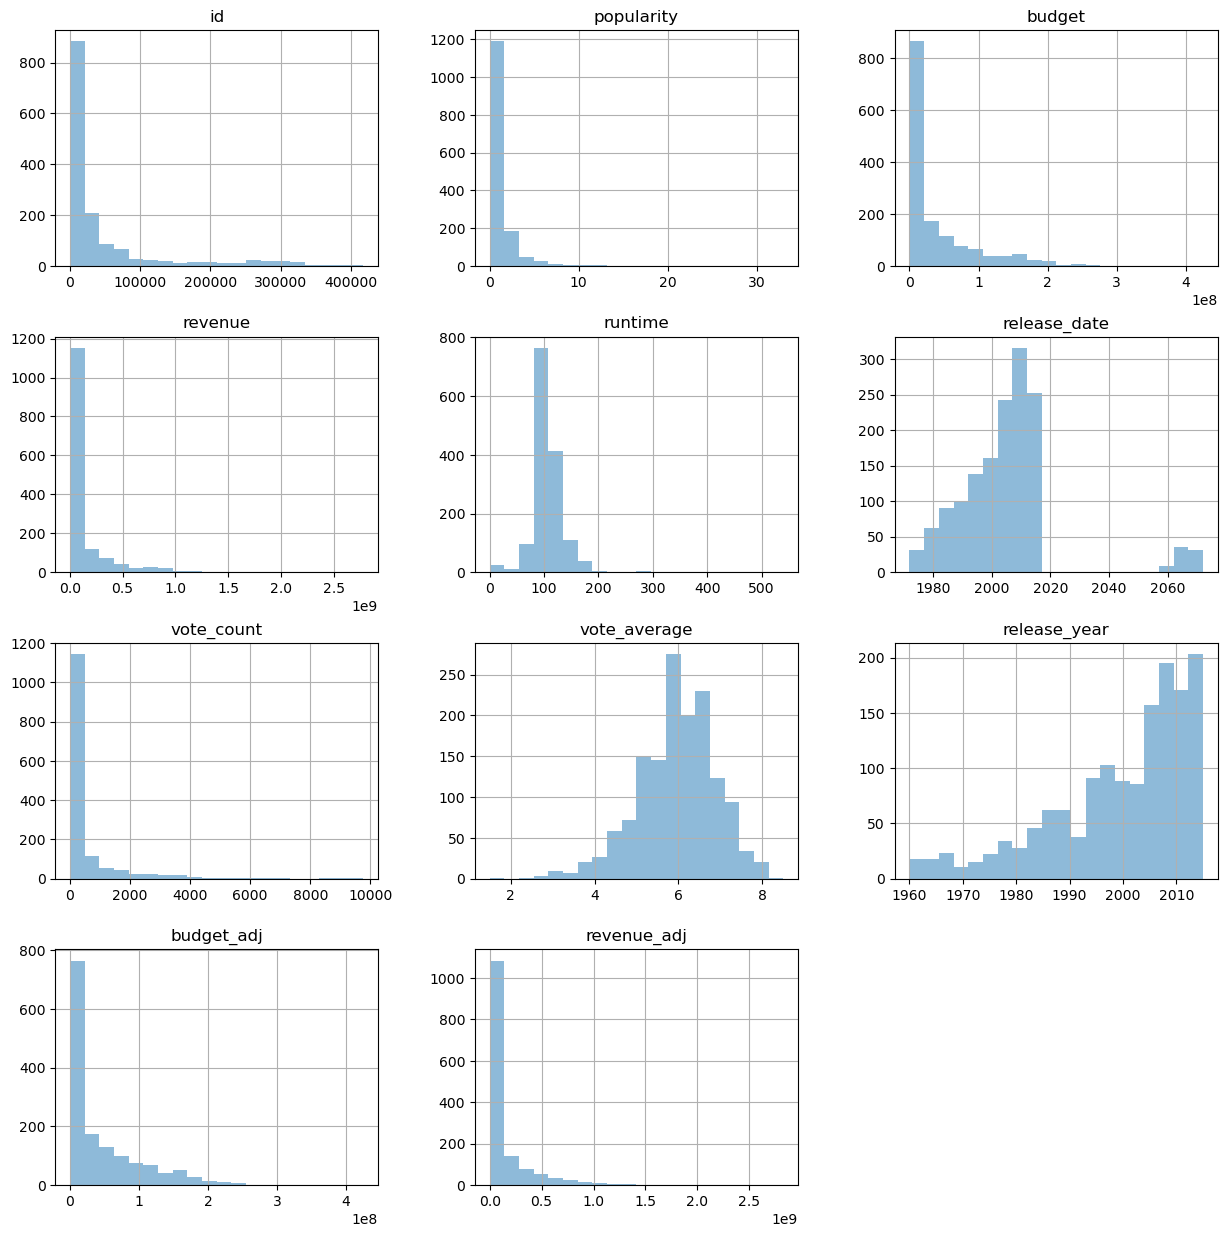

In [58]:
adventure_movies= new_df.query('genres == "Adventure"')
adventure_movies.hist(alpha=0.5, bins=20, label='Adventure',figsize = (15,15))

Retrieve the movie with the largest budget among all the adventure movies in the list and let's see if it indeed cast the most votes compared to other adventure movies.

In [59]:
#max budget of a movie. in the adveenture categoriy
adventure_budgetMax=adventure_movies.budget.max()
adventure_budgetMax

425000000

In [60]:
#its voting
adventure_vote=adventure_movies.query('budget==425000000').vote_average
adventure_vote

2244    6.4
Name: vote_average, dtype: float64

The highest-budget movie name in the adventure category is The Warrior's Way.

In [61]:
adventure_movies.query('budget==425000000')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,46528,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure,2010-12-02,74,6.4,2010,425000000.0,11087569.0


In [62]:
#top rating  action movie in the list of adventure movies
adventure_movies.vote_average.max()

8.5

In [63]:
#max budget of 8.5 voting movie
adventure_movies.query('vote_average==8.5').budget.max()

0

The movie that has the most budget is The Warrior's Way with a vote average equal to 6.4. While the movie that cast the most votes is The Art of Flight with a budget equal to 0.

In [64]:
#movies. with 8.5 votes
adventure_movies.query('vote_average==8.5')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3690,68450,0.321341,0,0,The Art of Flight,Travis Rice|Nicolas Muller|Mark Landvik|Jake B...,Curt Morgan,80,Adventure,2011-09-08,60,8.5,2011,0.0,0.0


Movies with the same budget as the most rated movie but with less rating in Comparison.

In [65]:
#return Movies with the same budget as the most rated movie
adventure_movies[adventure_movies.budget==adventure_movies.query('vote_average==8.5').budget.max() ]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
74,347096,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,108,Adventure,2015-06-24,27,5.1,2015,0.0,0.000000e+00
92,370687,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Adventure,2015-12-19,11,5.4,2015,0.0,0.000000e+00
95,258509,1.841779,0,233755553,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,Walt Becker,92,Adventure,2015-12-17,278,5.7,2015,0.0,2.150550e+08
100,326359,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,8,Adventure,2015-03-09,475,7.0,2015,0.0,0.000000e+00
116,297291,1.380320,0,0,The Scorpion King: The Lost Throne,Victor Webster|Ellen Hollman|Barry Bostwick|Wi...,Mike Elliott,105,Adventure,2015-01-09,22,4.5,2015,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10838,22383,0.151845,0,0,The Professionals,Burt Lancaster|Lee Marvin|Robert Ryan|Woody St...,Richard Brooks,117,Adventure,2066-11-01,21,6.0,1966,0.0,0.000000e+00
10843,29710,0.252399,0,0,Khartoum,Charlton Heston|Laurence Olivier|Richard Johns...,Basil Dearden|Eliot Elisofon,134,Adventure,2066-06-09,12,5.8,1966,0.0,0.000000e+00
10844,23728,0.236098,0,0,Our Man Flint,James Coburn|Lee J. Cobb|Gila Golan|Edward Mul...,Daniel Mann,108,Adventure,2066-01-16,13,5.6,1966,0.0,0.000000e+00
10851,15347,0.342791,0,0,Born Free,Virginia McKenna|Bill Travers|Geoffrey Keen|Pe...,James Hill,95,Adventure,2066-06-22,15,6.6,1966,0.0,0.000000e+00


We can see that the adventure movie with the highest budget does not have the top rating value among the list of all adventure movies. In fact, the movie with 8.5 ratings cost much less budget while casting the most votes. 

Now lets look at the release date and duration of the movies with max budget in the adventure category 

In [66]:
#duration of adveenture movie with max budget
adventure_runtime=adventure_movies.query('budget==425000000').runtime
adventure_runtime

2244    100
Name: runtime, dtype: int64

let's comapre it with fantasy movies that has the max runtime 

In [67]:
#max duration of a movie in the adventure category
adventure_maxtime= adventure_movies.runtime.max()
adventure_maxtime

540

In [68]:
adventure_movies.query('runtime==540')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2214,189197,0.757082,120000000,0,The Pacific,James Badge Dale|Joseph Mazzello|Jon Seda|Asht...,Jeremy Podeswa|Tim Van Patten|David Nutter|Gra...,540,Adventure,2010-05-16,183,7.8,2010,120000000.0,0.0


The pacific is the name of the movies with longest runtime and as we can see above its' revenue and budget are less that what the The Warrior's Way made

In [69]:
print(adventure_movies.query('runtime==540').release_date)
print(adventure_movies.query('budget==425000000').release_date)

2214   2010-05-16
Name: release_date, dtype: datetime64[ns]
2244   2010-12-02
Name: release_date, dtype: datetime64[ns]


the released date of highest budget movie is on the year of 2010 also the movie of longest duration time in adventure category released on 2010,  the lunch dates of the two movies are close. even though there is a different in the overall budget and revenue of the two movies which implies there are other factors contribute on required budget and expected revenue.  

### Research Question 3 : Does comedy movies bring more revenue than drama ones and does it (revenue) impact by the popularity?

let's view all Categories of movies with corresponding revenue values.

Note: independent variable (single variable) is movie types based on comedy/drama and multiple variables are revenue,  popularity.

Text(0.5, 1.0, "Movies' revenue based on categories ")

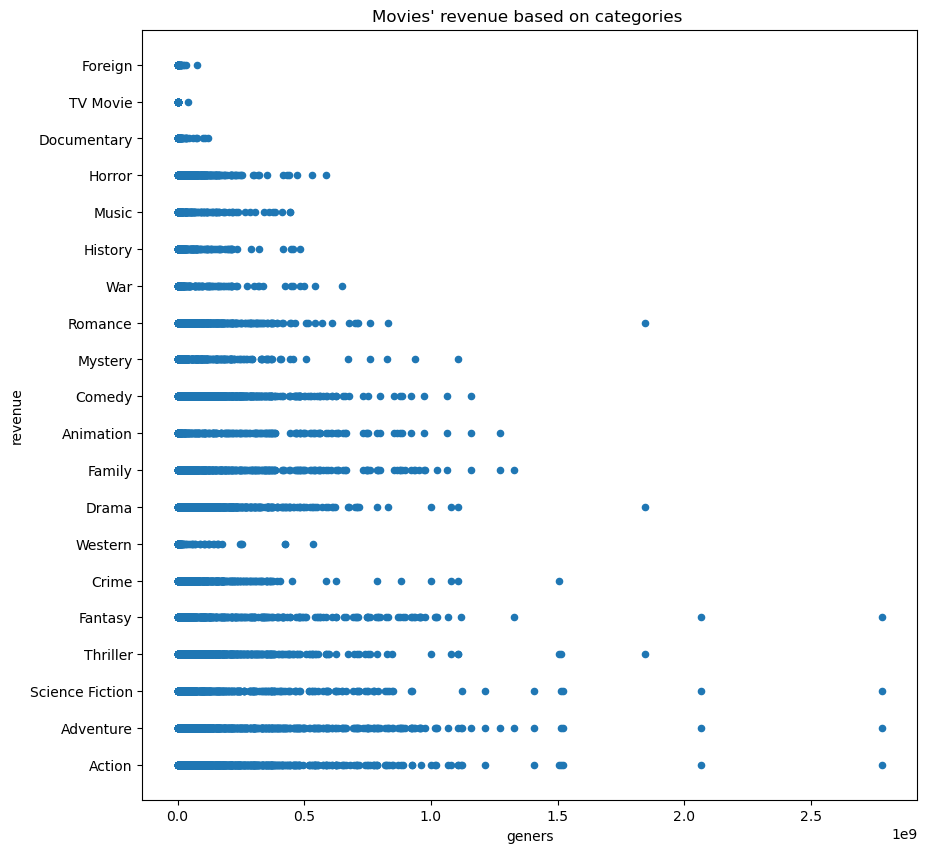

In [88]:
#plot of Movies' revenue based on categories
new_df.plot(x='revenue', y= 'genres', kind = 'scatter',figsize = (10,10));
plt.xlabel('geners')
plt.ylabel('revenue')
plt.title("Movies' revenue based on categories ")

Another graph to view the mean of revenue of all categories in our data frame and as we can see the category with the highest revenue adventure movies, comes in second place fantasy movies, and in third place is animation movies.

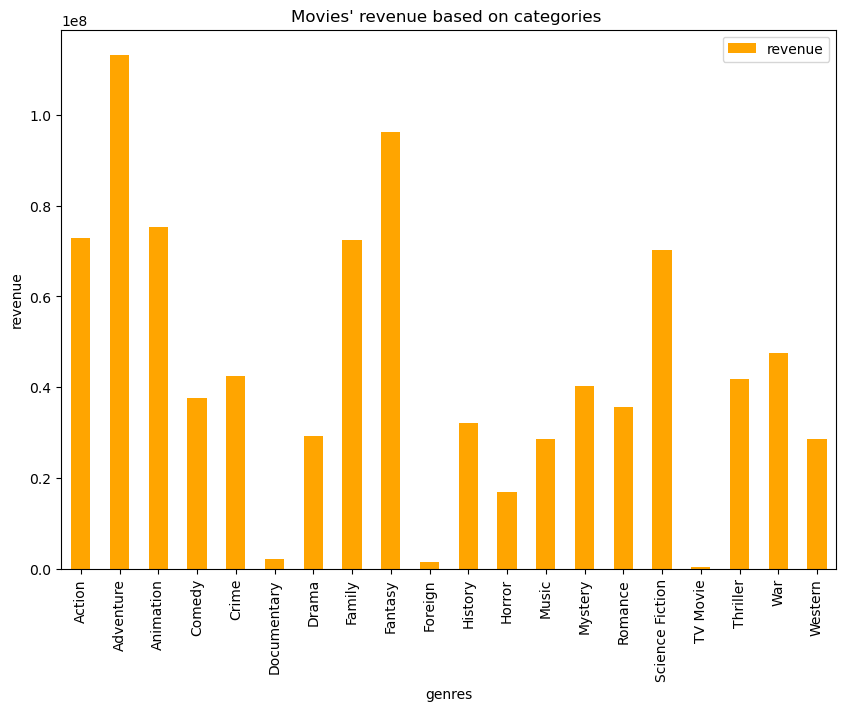

In [72]:
#plot of  Movies' revenue based on categories
new_df.groupby('genres').revenue.mean().plot(kind='bar',figsize = (10,7), color='orange')
plt.ylabel('revenue')
plt.title("Movies' revenue based on categories ")
plt.legend()

In [73]:
#funtion that need one input parameter inorder (one char) and return dataframe result that match the query condition as shown below
def data_query(value):
    if value == 'D':
     return new_df.query('genres == "Drama"') 
    elif value=='C':
     return new_df.query('genres == "Comedy"')
    else:
     return new_df.query('genres == "Drama" or genres == "Comedy"')

but we are interested in the comparison of drama movies and comedy movies, which one brought more revenue through the years. as we can see that the comedy movies' revenue is greater than the drama movies' revenue.

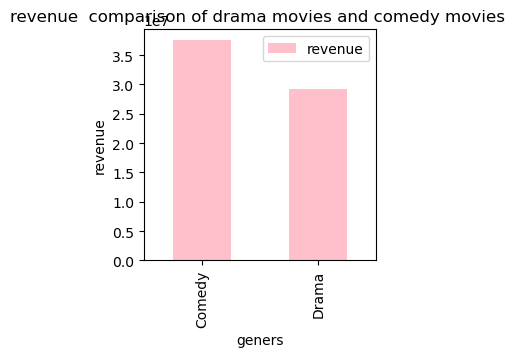

In [74]:
#plot of revenue  comparison of drama movies and comedy movies
data_query("").groupby('genres').revenue.mean().plot(kind='bar',label='revenue',figsize = (3,3), color='pink');
plt.xlabel('geners')
plt.ylabel('revenue')
plt.title("revenue  comparison of drama movies and comedy movies ")
plt.legend()

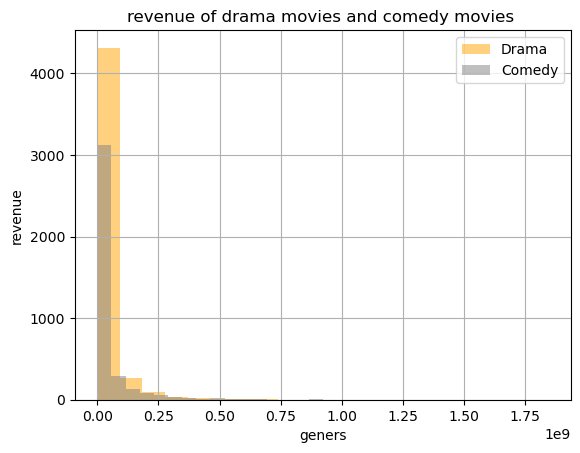

In [75]:
   #plot of revenue of drama movies and comedy movies
    data_query("D").revenue.hist(alpha=0.5, bins=20,color='orange', label='Drama')
    data_query("C").revenue.hist(alpha=0.5, bins=20,color='gray' ,label='Comedy')
    plt.xlabel('geners')
    plt.ylabel('revenue')
    plt.title("revenue of drama movies and comedy movies ")
    plt.legend()

let's see the popularity factor of these movies in the drama and comedy categories. which category is more popular? As we can see there is closeness in the popularity of the two categories but the drama movies as clearly shown in the graph below is more popular (green lines) than the comedy ones. clearly, the revenue is not impacted by the popularity factor as the comedy movies brought more revenue while the drama movies are more popular.

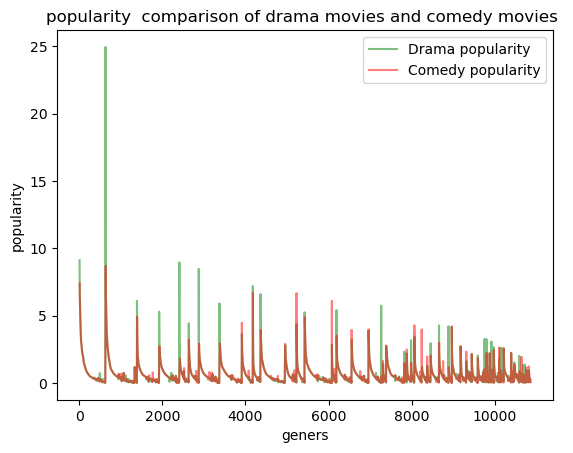

In [79]:
#plot of popularity  comparison of drama movies and comedy movies
plt.figure();
with pd.plotting.plot_params.use("x_compat", True):
    data_query("D").popularity.plot(color="g",alpha=0.5,label='Drama popularity')
    data_query("C").popularity.plot(color="r",alpha=0.5,label='Comedy popularity')
    plt.xlabel('geners')
    plt.ylabel('popularity')
    plt.title("popularity  comparison of drama movies and comedy movies ")
    plt.legend()

Max value of popularity of two categories (drama and comedy) and as shown one of the drama movies has a popularity of 25 while the max value of popularity in the comedy movie is close to 10.

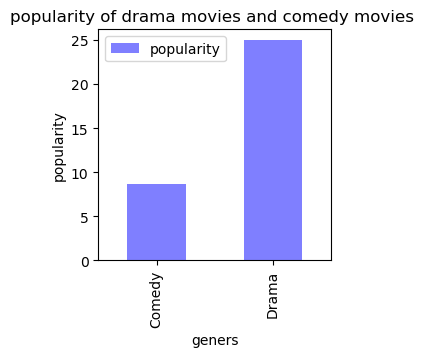

In [80]:
#plot popularity of drama movies and comedy movies
data_query("").groupby('genres').popularity.max().plot(alpha=0.5,kind='bar',figsize = (3,3), color='blue')
plt.xlabel('geners')
plt.ylabel('popularity')
plt.title("popularity of drama movies and comedy movies ")
plt.legend()

Another graph shows the distribution of the popularity factor among the two categories. The secondary y on the right is for the comedy Movies as the value will not exceed 8.

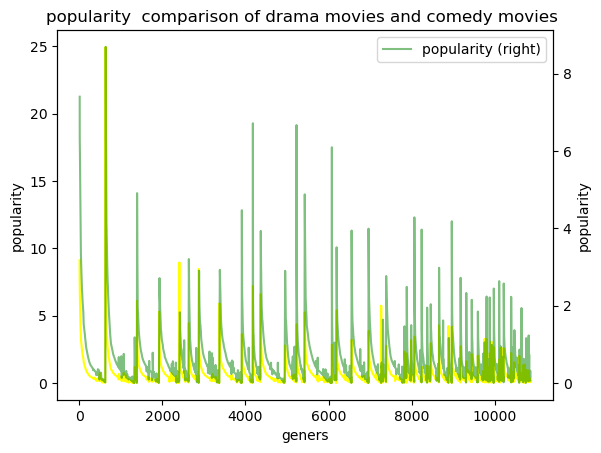

In [83]:
#plot of popularity  comparison of drama movies and comedy movies
data_query("D").popularity.plot(color='yellow');
plt.xlabel('geners')
plt.ylabel('popularity')
data_query("C").popularity.plot(secondary_y=True, style="g",alpha=0.5);
plt.xlabel('geners')
plt.ylabel('popularity')
plt.title("popularity  comparison of drama movies and comedy movies ")
plt.legend()

let's see if popularity is associated with or impacted by the vote average. The following graph shows the voting average and categories of movies, documentary movies have cast the most votes.

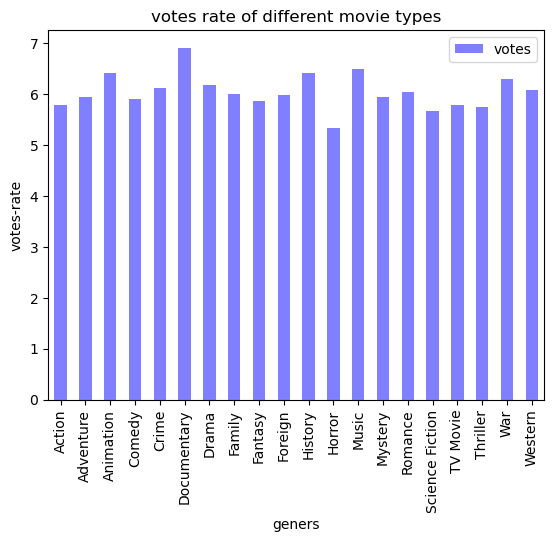

In [85]:
#plot of votes rate of different movie types
new_df.groupby('genres').vote_average.mean().plot(kind='bar',alpha=0.5, color= 'blue', label='votes')
plt.xlabel('geners')
plt.ylabel('votes-rate')
plt.title('votes rate of different movie types')
plt.legend()

In this graph the vote average mean for drama movies is greater than the vote average for comedy movies. Therefore, yes there is a relationship or dependencies between the two factors. (popularity and voting). 

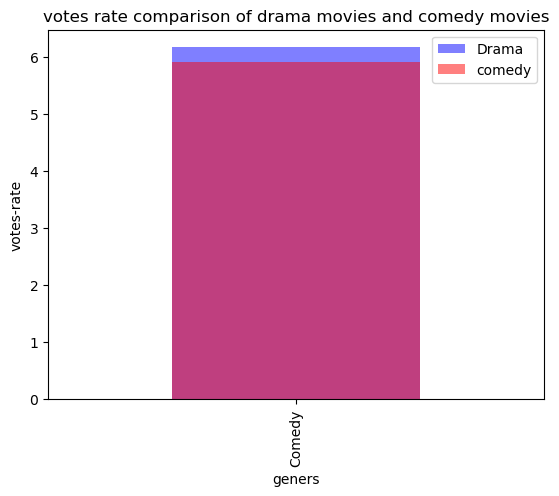

In [87]:
#plot of otes rate comparison of drama movies and comedy movies
data_query("D").groupby('genres').vote_average.mean().plot(kind='bar',alpha=0.5, color= 'blue', label='Drama')
data_query("C").groupby('genres').vote_average.mean().plot(kind='bar',alpha=0.5, color= 'red', label='comedy')
plt.xlabel('geners')
plt.ylabel('votes-rate')
plt.title('votes rate comparison of drama movies and comedy movies')
plt.legend()

<a id='conclusions'></a>
## Conclusions

> **1**: The three categories of movies that required the largest budget amount among all categories (types of movies) are Action movies, adventure movies, and fantasy movies. The reason for these categories to require a massive budget is that those types of movies need more offers, dangerous scenes, a lot of types of equipment, and Technology specialists staff to reach the final image of a great, worth-to-watch type of movie with a realistic view.

> **2**: Movie budget does not impact the rating of a movie, a movie can have a large amount of budget yet cast fewer votes in comparison to a small-budget movie that has a top rating. Therefore, there is no dependency between these factors.

> **3**: Comedy movies brought more revenue than drama ones while the popularity and rating are not impacted at all by the revenue.

<a id='conclusions'></a>
## Limitations 

> **1**: some movies have budget zero or revenue zero or both which not realistic at all. each movie requires these kind factors for example revenue should be impacted by how many people did attened a particular movie which can affect the papulority and rating factors.

> **2**: some movies have budget and revenue but lack of having cast and directors names. In this project i replaced null value of cast and Director with not-specified in-order not to imapct the overall amount of budget or revenue for each Category of movie. but sill not Suitable all the time specilly if the names impact on sequence of the analysis process.
